In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/content/first inten project (1).csv")
# Optional for better plot display
sns.set(style='whitegrid')


In [61]:
df.head()

Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  repeated  P-C  P-not-C  average price   \
0        224             Offline         0    0        0           88.00   
1          5              Online         0    0        0          106.68   
2          1              Online         0    0        0           50.00   
3        211              Online         0    0        0          100.00   
4         48              Online         0    0        0           77.00   

   special requests date of reservation booking status  
0                 0           10/2/2015   Not_Canceled  
1                 1           11/6/2018   Not_Canceled  
2                 0           2/28/2018       Canceled  
3                 1           5/20/2017       Canceled  
4                 0           4/11/2018       Canceled

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [65]:
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [66]:
df['p-c'].value_counts()

#checking data types to know what does this coulms describe
# repeated coulum states that prev history is important

p-c
0     35947
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: count, dtype: int64

In [67]:
df['p-not-c'].describe()

count    36285.000000
mean         0.153369
std          1.753931
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         58.000000
Name: p-not-c, dtype: float64

In [68]:
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [69]:
# Create binary target column: 1 = Canceled, 0 = Not Canceled
df["is_canceled"] = df["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)


In [70]:
#asking a question to guess what p-c means
df.groupby('p-c')['is_canceled'].mean()


p-c
0     0.330292
1     0.055556
2     0.000000
3     0.023256
4     0.000000
5     0.000000
6     0.000000
11    0.000000
13    1.000000
Name: is_canceled, dtype: float64

In [71]:
df[['p-c', 'is_canceled']].corr()
#that shows that when p-c increase is canceled decrease,weak corelation but it gives an indicator that p-c means the past times a cx canceled

p-c  is_canceled
p-c          1.000000    -0.033725
is_canceled -0.033725     1.000000

In [72]:
df.head()

booking_id  number_of_adults  number_of_children  number_of_weekend_nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number_of_week_nights  type_of_meal  car_parking_space    room_type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead_time market_segment_type  repeated  p-c  p-not-c  average_price  \
0        224             Offline         0    0        0          88.00   
1          5              Online         0    0        0         106.68   
2          1              Online         0    0        0          50.00   
3        211              Online         0    0        0         100.00   
4         48              Online         0    0        0          77.00   

   special_requests date_of_reservation booking_status  is_canceled  
0                 0           10/2/2015   Not_Canceled            0  
1                 1           11/6/2018   Not_Canceled            0  
2                 0           2/28/2018       Canceled            1  
3                 1           5/20/2017       Canceled            1  
4                 0           4/11/2018       Canceled            1

In [73]:
# Drop unnecessary columns for now
df.drop(columns=["booking_id", "booking_status", "date_of_reservation"], inplace=True)


In [74]:
df.head()

number_of_adults  number_of_children  number_of_weekend_nights  \
0                 1                   1                         2   
1                 1                   0                         1   
2                 2                   1                         1   
3                 1                   0                         0   
4                 1                   0                         1   

   number_of_week_nights  type_of_meal  car_parking_space    room_type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead_time market_segment_type  repeated  p-c  p-not-c  average_price  \
0        224             Offline         0    0        0          88.00   
1          5              Online         0    0        0         106.68   
2          1              Online         0    0        0          50.00   
3        211              Online         0    0        0         100.00   
4         48              Online         0    0        0          77.00   

   special_requests  is_canceled  
0                 0            0  
1                 1            0  
2                 0            1  
3                 1            1  
4                 0            1

/tmp/ipython-input-75-4175331249.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_canceled', data=df, palette='Set1')


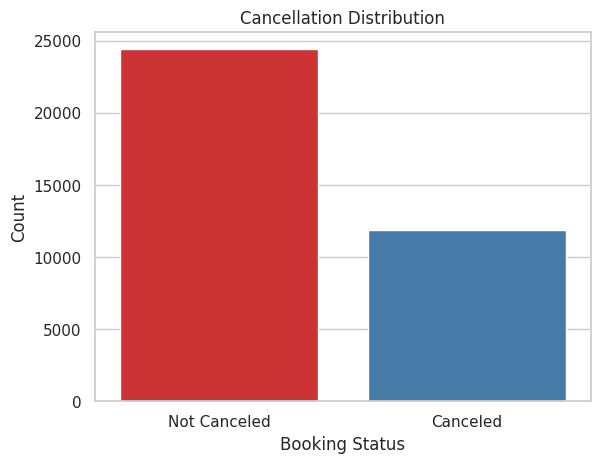

In [75]:
sns.countplot(x='is_canceled', data=df, palette='Set1')
plt.title("Cancellation Distribution")
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.xlabel("Booking Status")
plt.ylabel("Count")
plt.show()


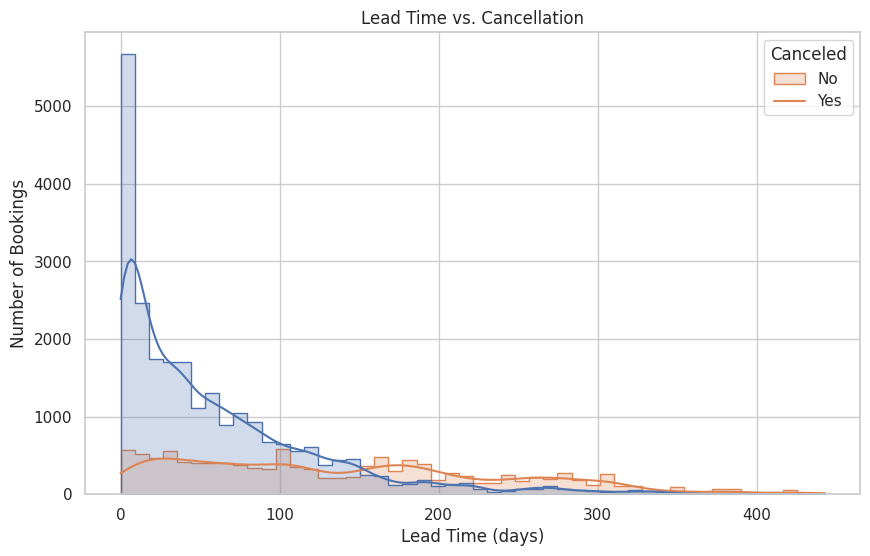

In [76]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='lead_time', hue='is_canceled', bins=50, kde=True, element='step')
plt.title("Lead Time vs. Cancellation")
plt.xlabel("Lead Time (days)")
plt.ylabel("Number of Bookings")
plt.legend(title='Canceled', labels=['No', 'Yes'])
plt.show()
#booking were canceled = orange
#booking were notcanceled = blue
#as lead  time increase the the cancelation increase as well


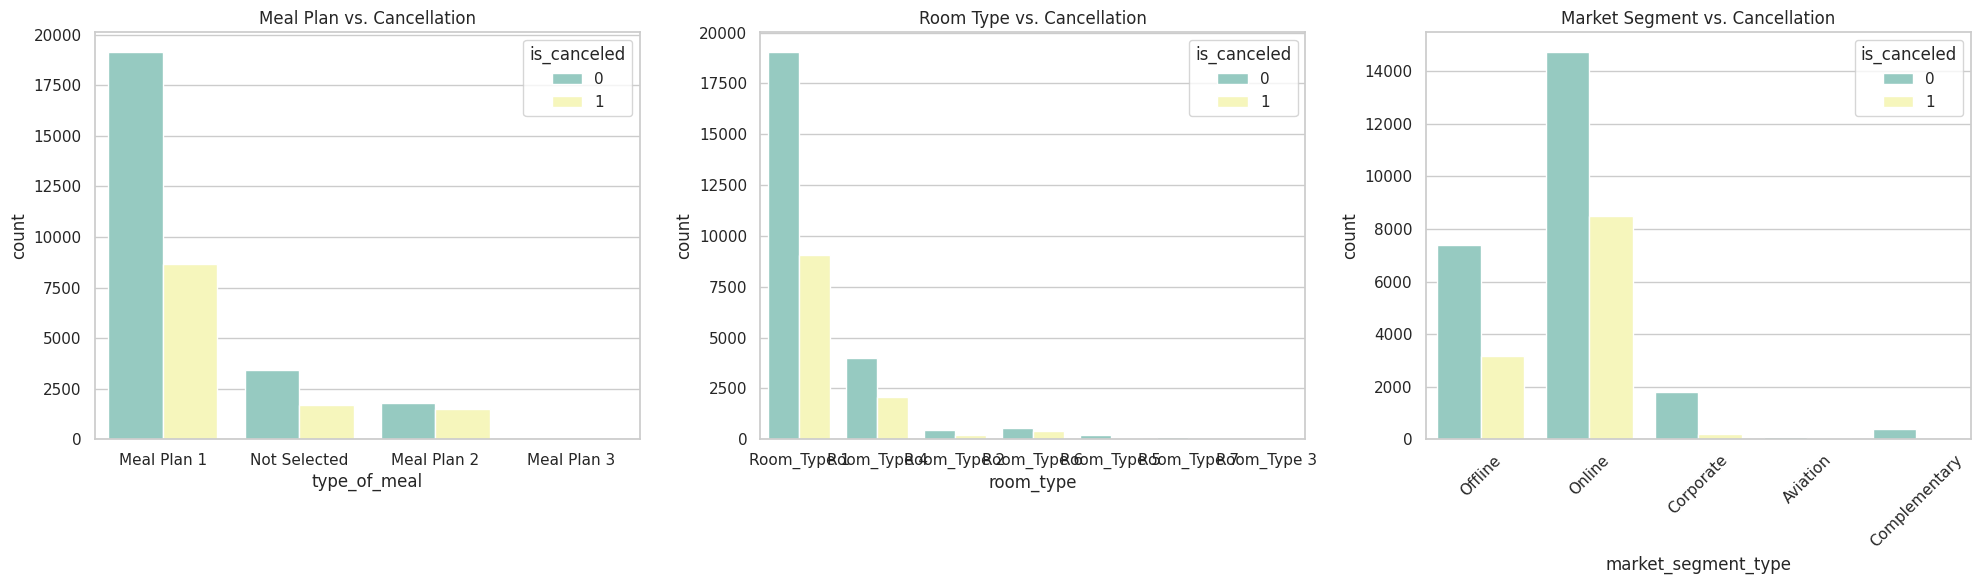

In [77]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Meal plan
sns.countplot(data=df, x='type_of_meal', hue='is_canceled', ax=axes[0], palette='Set3')
axes[0].set_title('Meal Plan vs. Cancellation')

# Room type
sns.countplot(data=df, x='room_type', hue='is_canceled', ax=axes[1], palette='Set3')
axes[1].set_title('Room Type vs. Cancellation')

# Market segment
sns.countplot(data=df, x='market_segment_type', hue='is_canceled', ax=axes[2], palette='Set3')
axes[2].set_title('Market Segment vs. Cancellation')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


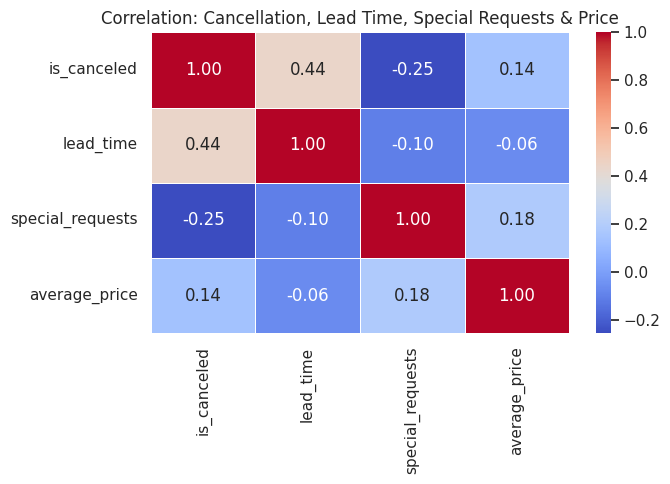

In [78]:
# Select the relevant columns
corr_df = df[['is_canceled', 'lead_time', 'special_requests', 'average_price']]

# Compute the correlation matrix
corr_matrix = corr_df.corr()

# Plot the heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation: Cancellation, Lead Time, Special Requests & Price")
plt.tight_layout()
plt.show()

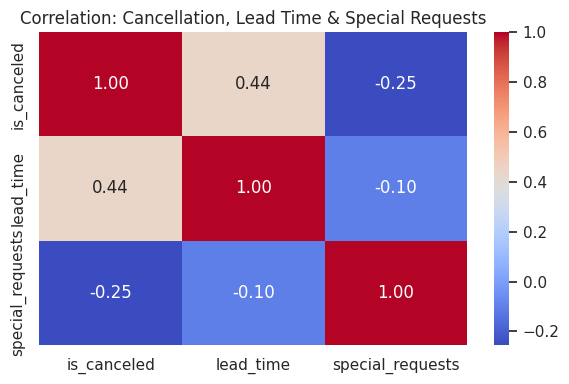

In [79]:
# Select only the relevant numeric columns
corr_df = df[['is_canceled', 'lead_time', 'special_requests']]

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation: Cancellation, Lead Time & Special Requests")
plt.tight_layout()
plt.show()